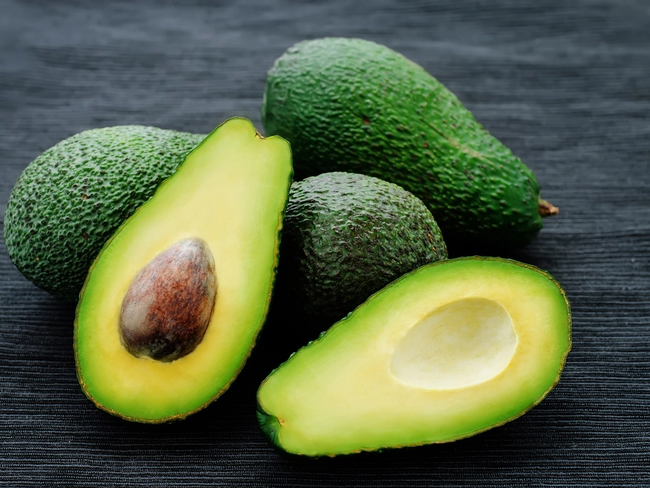

In [2]:
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings .filterwarnings('ignore')
data=pd.read_csv("C:\Users\Nagesh\Desktop\Naresh IT\project\RESUME PROJECT -- PRICE PREDICTION\avocado.csv",index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [12]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<Axes: xlabel='AveragePrice', ylabel='Density'>

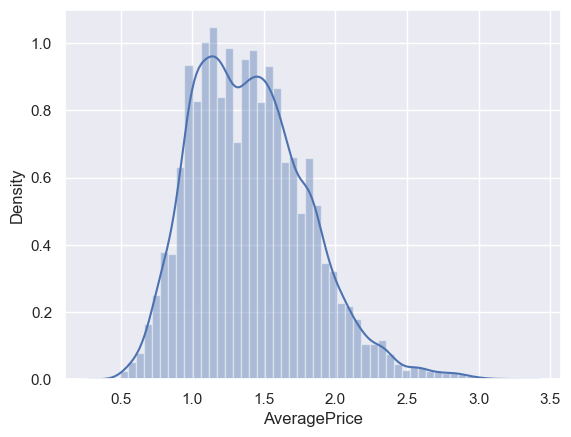

In [14]:
sns.distplot(data['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

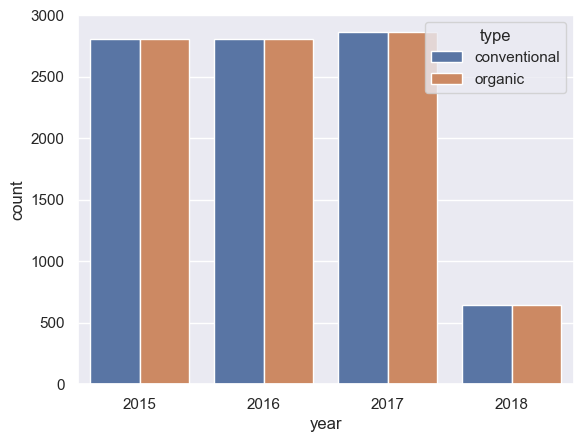

In [20]:
sns.countplot(x='year',data=data,hue='type')

In [22]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='AveragePrice', ylabel='type'>

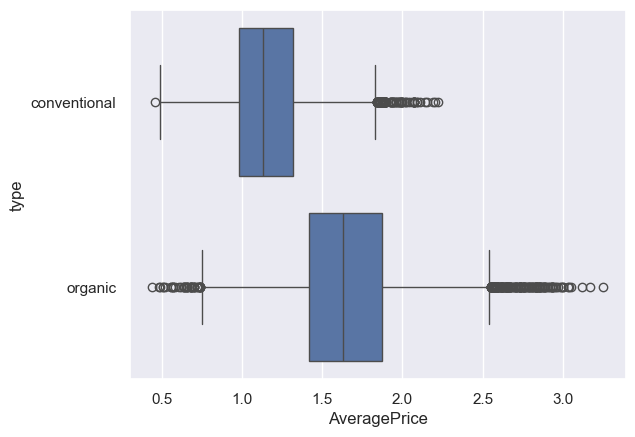

In [24]:
sns.boxplot(y='type',x='AveragePrice',data=data)

<Axes: xlabel='year', ylabel='AveragePrice'>

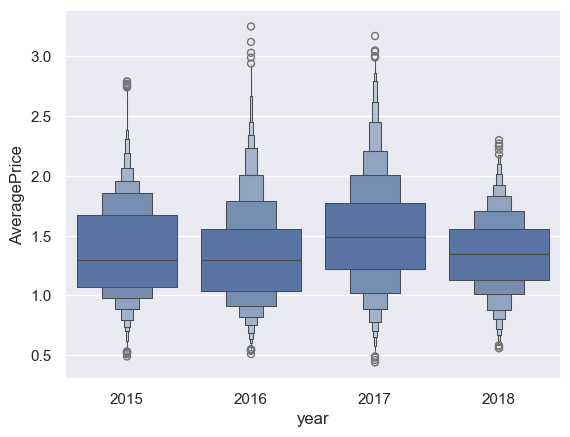

In [36]:
data.year=data.year.apply(str)
sns.boxenplot(x='year',y='AveragePrice',data=data)
 

In [38]:
data['type']=data['type'].map({'conventional':0,'organic':1})

data.Date=data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

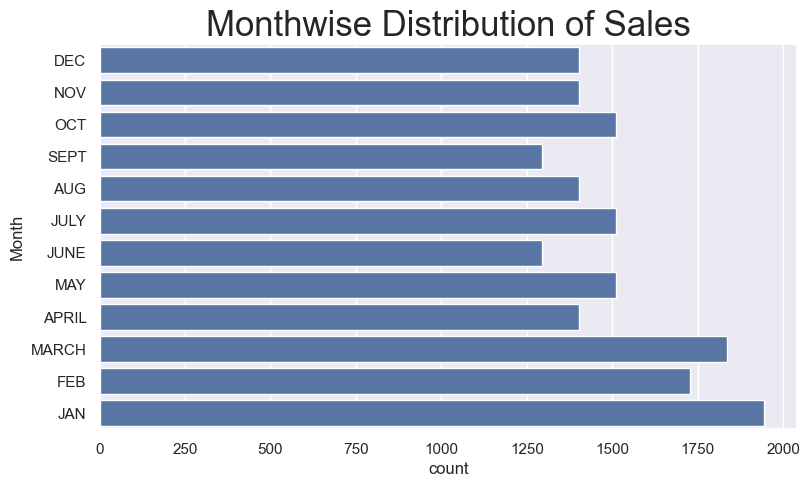

In [46]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [58]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[cols_to_std])
x_train[cols_to_std] = scaler.transform(x_train[cols_to_std])
x_test[cols_to_std] = scaler.transform(x_test[cols_to_std])

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
result=pd.DataFrame(columns=['MAE','MSE','R2_score'])
for method,func in regressors.items():
    model=func.fit(x_train,y_train)
    pred=model.predict(x_test)
    result.loc[method]=[np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
        
    ]

In [78]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [98]:
model.fit(x=x_train.values,y=y_train.values,
          validation_data=(x_val.values,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.7314 - val_loss: 0.0932
Epoch 2/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1391 - val_loss: 0.1134
Epoch 3/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1213 - val_loss: 0.0598
Epoch 4/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0985 - val_loss: 0.0519
Epoch 5/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0919 - val_loss: 0.0579
Epoch 6/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0836 - val_loss: 0.0438
Epoch 7/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0770 - val_loss: 0.0432
Epoch 8/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0751 - val_loss: 0.0402
Epoch 9/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0715 - val_loss: 0.0438
Epoch 10/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0651 - val_loss: 0.0405
Epoch 11/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0639 - val_loss: 0.0362
Epoch 12/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

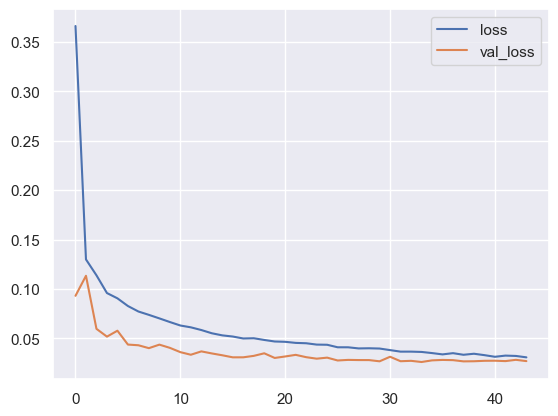

In [100]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [102]:
dnn_pred=model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [118]:
result.loc['Deep Neural Network'] = [
    round(mean_absolute_error(y_test, dnn_pred), 3),
    round(mean_squared_error(y_test, dnn_pred), 3),
    round(r2_score(y_test, dnn_pred), 3)
]
result

,MAE,MSE,R2_score
Linear Regression,0.181,0.057,0.646
Decision Tree,0.126,0.036,0.776
Random Forest,0.095,0.018,0.887
Support Vector Machines,0.116,0.027,0.834
K-nearest Neighbors,0.099,0.023,0.859
XGBoost,0.093,0.016,0.901
Deep Neural Network,0.119,0.028,0.828


In [120]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [122]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.103000,0.020000,0.876000
Random Forest,0.112000,0.025000,0.848000
Support Vector Machines,0.139000,0.038000,0.765000
K-nearest Neighbors,0.138000,0.044000,0.728000
Decision Tree,0.156000,0.054000,0.667000
Linear Regression,0.183000,0.058000,0.642000
